# Árboles de regresión

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('../datasets/boston/Boston.csv')
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
data.shape

(506, 14)

In [4]:
colnames = data.columns.values.tolist()
predictors = colnames[:13]
target = colnames[13]

X = data[predictors]
Y = data[target]

In [5]:
from sklearn.tree import DecisionTreeRegressor

In [19]:
regtree = DecisionTreeRegressor(min_samples_split=30, min_samples_leaf=10, max_depth = 5, random_state=0)

In [20]:
regtree.fit(X, Y)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=10,
           min_samples_split=30, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [21]:
preds = regtree.predict(data[predictors])

In [22]:
data['preds'] = preds

In [23]:
data[['preds', 'medv']]

,preds,medv
0,23.787500,24.0
1,23.787500,21.6
2,35.247826,34.7
3,35.247826,33.4
4,35.247826,36.2
5,23.787500,28.7
6,21.863636,22.9
7,20.020833,27.1
8,20.020833,16.5
9,20.020833,18.9


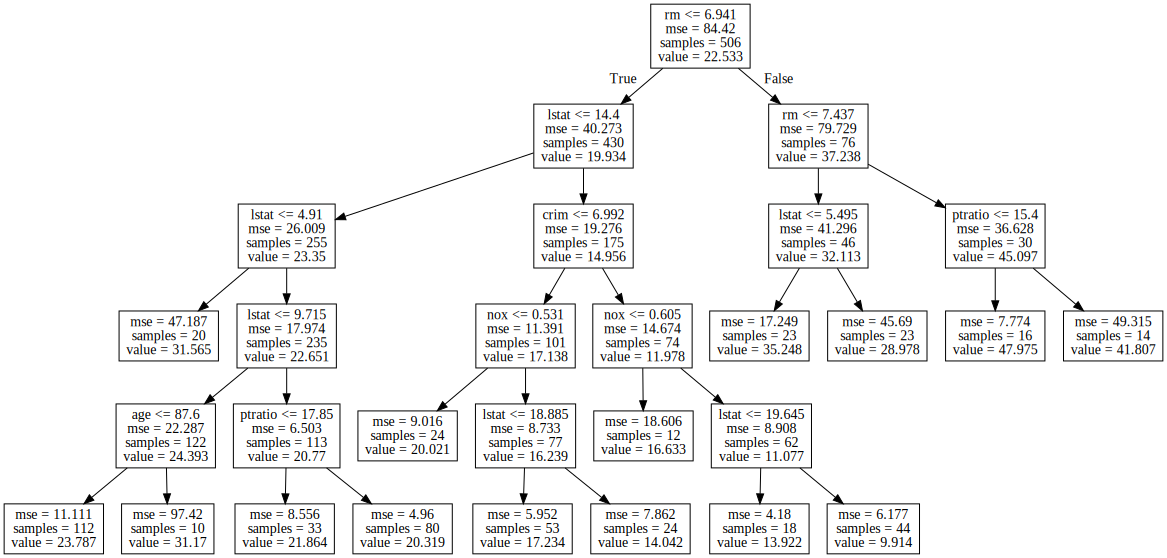

In [24]:
from sklearn.tree import export_graphviz

with open('resources/boston_tree.dot', 'w') as dotfile:
    export_graphviz(regtree, out_file = dotfile, feature_names = predictors)
    dotfile.close()
    
import os
from graphviz import Source

file = open('resources/boston_tree.dot', 'r')
text = file.read()

Source(text)

In [25]:
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score
import numpy as np

In [26]:
cv = KFold(n = X.shape[0], n_folds = 20, shuffle = True, random_state = 1)
scores = cross_val_score(regtree, X, Y, scoring = 'mean_squared_error', cv = cv, n_jobs = 1)
print(scores)
score = np.mean(scores)
print(score)

[-14.77590024 -14.29886559 -18.50447577 -13.82955829 -13.03072867
 -23.38911398 -32.23244462 -57.91101331 -12.64150692 -11.6826727
 -23.55429099  -9.2326917   -9.0873979  -20.77379054 -33.72848594
 -39.1961033  -19.65353831 -44.65877678 -15.58437117  -8.26014583]
-21.8012936279


In [27]:
list(zip(predictors, regtree.feature_importances_))

[('crim', 0.032184533425691254),
 ('zn', 0.0),
 ('indus', 0.0),
 ('chas', 0.0),
 ('nox', 0.016195328299152056),
 ('rm', 0.63418761930165624),
 ('age', 0.014165271650613091),
 ('dis', 0.0),
 ('rad', 0.0),
 ('tax', 0.0),
 ('ptratio', 0.0096204581963771144),
 ('black', 0.0),
 ('lstat', 0.29364678912651038)]

## Random Forest

In [28]:
from sklearn.ensemble import RandomForestRegressor

In [38]:
forest = RandomForestRegressor(n_jobs = 2, oob_score = True, n_estimators = 10000)
forest.fit(X, Y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=2,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [39]:
data['rforest_pred'] = forest.oob_prediction_
data[['rforest_pred', 'medv']]

,rforest_pred,medv
0,28.277420,24.0
1,22.576027,21.6
2,34.486093,34.7
3,34.823469,33.4
4,34.340971,36.2
5,24.053023,28.7
6,20.241242,22.9
7,17.247091,27.1
8,17.951036,16.5
9,19.755087,18.9


In [40]:
data['rforest_error2'] = (data['rforest_pred'] - data['medv']) ** 2
sum(data['rforest_error2']) / len(data)

10.15418135054527

In [41]:
forest.oob_score_

0.87971766480551827